---

# DS400: Assignment V: GitHub and the ticketmaster.com API (Python)

##### Max Mohr (Student ID: 6304784)
##### January 31, 2023

*I hereby acknowledge that the submitted assignment is my own work. During the preparation of this assignment I have worked together with Max Mohr and Felix Koehn.*

GitHub Repository: https://github.com/maxjmohr/MSc_01_DSPM_Assignment05

In [1]:
# set working directory
import os
os.chdir("/Users/mAx/Documents/Master/Assignment_05/")

In [2]:
# load packages
import geopandas as gpd
import requests
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

---

### Setting up a new GitHub repository

<div class="alert alert-block alert-info">
    
1. Register on github.com in case you have not done this already.
</div>

<div class="alert alert-block alert-info">
    
2. Initialize a new public repository for this assignment on GitHub.
</div>

<div class="alert alert-block alert-info">
    
3. For the following exercises of this assignment, follow the standard Git workflow (i.e., pull the latest
version of the project to your local computer, then stage, commit, and push all the modifications that you make throughout the project). Every logical programming step should be well documented on GitHub with a meaningful commit message, so that other people (e.g., your course instructor) can follow and understand the development history. You can do this either using Shell commands or a Git GUI of your choice.
</div>

<div class="alert alert-block alert-info">

4. In the HTML file that you submit, include the hyperlink to the project repository (e.g., https://github. com/yourUserName/yourProjectName)
</div>

---

### Getting to know the API

<div class="alert alert-block alert-info">
    
5. Visit the documentation website for the API provided by ticketmaster.com (see here). Familiarize your- self with the features and functionalities of the Ticketmaster Discovery API. Have a particular look at rate limits.
</div>

<div class="alert alert-block alert-info">

6. Whithin the scope of this assignment, you do not have to request your own API key. Instead retrieve a valid key from the API Explorer. This API key enables you to perform the GET requests needed throughout this assignment. Even though this API key is not secret per se (it is publicly visible on the API Explorer website), please comply to the common secrecy practices discussed in the lecture and the tutorial: Treat the API key as a secret token. Your API key should neither appear in the code that you are submitting nor in your public GitHub repository.
</div>

In [5]:
# access the key from txt file
with open('api_keys/ticketmaster_api_key.txt') as script:
    ticketmaster_api_key = script.read()

---

### Interacting with the API - the basics

<div class="alert alert-block alert-info">
    
7. Perform a first GET request, that searches for event venues in Germany (countryCode = "DE"). Extract the content from the response object and inspect the resulting list. Describe what you can see.
</div>

In [33]:
# perform get request
api_content = requests.get("https://app.ticketmaster.com/discovery/v2/venues?",
                            params = {"apikey": ticketmaster_api_key,
                                      "countryCode": "DE",
                                      "locale": "*"
                                      }).content


api_content

b'{"_embedded":{"venues":[{"name":"Grosse Freiheit 36","type":"venue","id":"KovZpZAn6vEA","test":false,"url":"http://www.ticketmaster.de/venue/287636","locale":"en-de","images":[{"ratio":"16_9","url":"https://s1.ticketm.net/dbimages/962v.","width":205,"height":115,"fallback":false}],"postalCode":"22767","timezone":"Europe/Berlin","city":{"name":"Hamburg"},"country":{"name":"Germany","countryCode":"DE"},"address":{"line1":"Grosse Freiheit 36"},"location":{"longitude":"9.957905","latitude":"53.551187"},"markets":[{"name":"Germany","id":"210"}],"dmas":[{"id":610}],"boxOfficeInfo":{"phoneNumberDetail":"Telefon tags\xc3\xbcber: (040) 31 77 78- 0 Gro\xc3\x9fe Freiheit 36 22767 Hamburg E-Mail: info@grossefreiheit36.de"},"upcomingEvents":{"_total":1,"mfx-de":1,"_filtered":0},"ada":{"adaPhones":"+49.(0)1805 - 969 0000 (14 Ct./Min.)","adaCustomCopy":"Sollten Sie besondere Sitzplatzw\xc3\xbcnsche haben, pr\xc3\xbcfen Sie bitte die Informationsseite des Veranstaltungsortes. F\xc3\xbcr weitergehend

By briefly looking at the content of the get request, we are able to see some of the venues in Germany. At least regarding the few examples we are able to see, the type is indeed a "venue". Furthermore, te countryCode is "DE".

However, not all venues have the exact same information displayed in each column. For example, one venue named "Virtual event" doesn't have any data for the column "address". Another example is the venue named "Huxleys Neue Welt" has an image while others don't.

We in total have 12.934 elements that are German venues, displayed over 647 pages. One page displays 20 results.

<div class="alert alert-block alert-info">

8. Extract the name, the city, the postalCode and address, as well as the url and the longitude and latitude of the venues to a data frame. This data frame should have the following structure (see pdf).
</div>

In [32]:
venues = requests.get("https://app.ticketmaster.com/discovery/v2/venues?",
                        params = {"apikey": ticketmaster_api_key,
                                  "countryCode": "DE",
                                   "locale": "*"
                                  }).json()

# The data we are looking for lies in _embedded/venues
venues = venues['_embedded']['venues']

# Select the columns ["name","city","postalCode","address","url","location"]
# If a venue doesn't have a certain column, the column will be filled with a None value
venues_name       = [v['name'] if ('name' in v.keys()) else None for v in venues]
venues_city       = [v['city']['name'] if ('city' in v.keys()) else None for v in venues]
venues_postalCode = [v['postalCode'] if ('postalCode' in v.keys()) else None for v in venues]
venues_address    = [v['address']['line1'] if ('address' in v.keys()) and ('line1' in v['address'].keys()) else None for v in venues]
venues_url        = [v['url'] if ('url' in v.keys()) else None for v in venues]
venues_longitude  = [v['location']['longitude'] if ('location' in v.keys()) and ('longitude' in v['location'].keys()) else None for v in venues]
venues_latitude   = [v['location']['latitude'] if ('location' in v.keys()) and ('latitude' in v['location'].keys()) else None for v in venues]

# Create dataframe
venues_df = pd.DataFrame({'name': venues_name,
                          'city': venues_city,
                          'postalCode': venues_postalCode,
                          'address': venues_address,
                          'url': venues_url,
                          'longitude': venues_longitude,
                          'latitude': venues_latitude
                          })

# Change the formats of some columns
venues_df = venues_df.astype({'longitude':float})
venues_df = venues_df.astype({'latitude':float})

venues_df
# venues_df.dtypes  # to check the data types of columns

,name,city,postalCode,address,url,longitude,latitude
0,Grosse Freiheit 36,Hamburg,22767,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187
1,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
2,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.421380,52.486391
3,Zentrum am Park,Emmelshausen,56281,Rhein-Mosel-Straße 45,https://www.ticketmaster.de/venue/zentrum-am-p...,7.556560,50.155440
4,Stadthalle (Theatersaal),Mülheim,45479,Theodor-Heuss-Platz 1,https://www.ticketmaster.de/venue/stadthalle-t...,6.874710,51.427780
5,Schlossgarten,Bruchsal,76646,Schloss Bruchsal,https://www.ticketmaster.de/venue/schlossgarte...,8.599080,49.126920
6,Stadthalle,Hockenheim,68766,Rathausstraße 3,https://www.ticketmaster.de/venue/stadthalle-h...,8.549080,49.318490
7,FZW,Dortmund,44263,Ritterstraße 20,https://www.ticketmaster.de/venue/fzw-dortmund...,7.450100,51.514810
8,Arena Trier,Trier,54292,Fort-Worth-Platz 1,https://www.ticketmaster.de/venue/arena-trier-...,6.664260,49.771830
9,Eissporthalle,Memmingen,87700,Hühnerbergstraße 19,https://www.ticketmaster.de/venue/eissporthall...,10.162930,47.979990


---

### Interacting with the API - advanced

<div class="alert alert-block alert-info">
    
9. Have a closer look at the list element named page. Did your GET request from exercise (7) return all event locations in Germany? Obviously not - there are of course much more venues in Germany than those contained in this list. Your GET request only yielded the first results page containing the first 20 out of several thousands of venues. Check the API documentation under the section Venue Search. How can you request the venues from the remaining results pages? Iterate over the results pages and perform GET requests for all venues in Germany. After each iteration, extract the seven variables name, city, postalCode, address, url, longitude, and latitude. Join the information in one large data frame. Print the first 10 rows and the shape of the resulting data frame. The resulting data frame should look something like this (note that the exact number of search results may have changed since this document has been last modified) (see pdf).
</div>

In [18]:
def get_country_venues(country_code, api_key):
    
    # Initialize empty dataframe
    results_df = pd.DataFrame()

    # First get request in order to get the number of pages with at least one result
    setup = requests.get("https://app.ticketmaster.com/discovery/v2/venues?",
                         params = {"apikey": api_key,
                                   "countryCode": country_code,
                                   "size": 500,  # set size to 500 so we have to loop through fewer pages
                                   "locale": "*"
                                   }).json()

    # Get the number of pages that have to be looped
    search_pages = setup['page']['totalPages']

    for i in range(search_pages):
        
        # Enforce a rate limit as only 5 requests per second possible
        time.sleep(1/5 + 0.00001)
        
        venues = None
        while venues is None:
            content = requests.get("https://app.ticketmaster.com/discovery/v2/venues?",
                                params = {"apikey": api_key,
                                            "countryCode": country_code,
                                            "size": 500,
                                            "locale": "*",
                                            "page": i
                                            }).json()
                                            
            # The data we are looking for lies in _embedded/venues
            venues = content['_embedded']['venues']

        # Select the columns ["name","city","postalCode","address","url","location"]
        # If a venue doesn't have a certain column, the column will be filled with a None value
        venues_name       = [v['name'] if ('name' in v.keys()) else None for v in venues]
        venues_city       = [v['city']['name'] if ('city' in v.keys()) else None for v in venues]
        venues_postalCode = [v['postalCode'] if ('postalCode' in v.keys()) else None for v in venues]
        venues_address    = [v['address']['line1'] if ('address' in v.keys()) and ('line1' in v['address'].keys()) else None for v in venues]
        venues_url        = [v['url'] if ('url' in v.keys()) else None for v in venues]
        venues_longitude  = [v['location']['longitude'] if ('location' in v.keys()) and ('longitude' in v['location'].keys()) else None for v in venues]
        venues_latitude   = [v['location']['latitude'] if ('location' in v.keys()) and ('latitude' in v['location'].keys()) else None for v in venues]

        # Create dataframe
        venues_df = pd.DataFrame({'name':     venues_name,
                                'city':       venues_city,
                                'postalCode': venues_postalCode,
                                'address':    venues_address,
                                'url':        venues_url,
                                'longitude':  venues_longitude,
                                'latitude':   venues_latitude
                                })

        # Concat the venues to the results df
        results_df = pd.concat([results_df,venues_df], ignore_index=True)

    # Change the formats of some columns
    results_df = results_df.astype({'longitude':float})
    results_df = results_df.astype({'latitude':float})

    return results_df

In [23]:
german_venues_df = get_country_venues('DE', ticketmaster_api_key)
german_venues_df.head(10)

# german_venues_df.dtypes  # to check the data types of columns

,name,city,postalCode,address,url,longitude,latitude
0,Grosse Freiheit 36,Hamburg,22767,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187
1,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
2,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.421380,52.486391
3,Zentrum am Park,Emmelshausen,56281,Rhein-Mosel-Straße 45,https://www.ticketmaster.de/venue/zentrum-am-p...,7.556560,50.155440
4,Stadthalle (Theatersaal),Mülheim,45479,Theodor-Heuss-Platz 1,https://www.ticketmaster.de/venue/stadthalle-t...,6.874710,51.427780
5,Schlossgarten,Bruchsal,76646,Schloss Bruchsal,https://www.ticketmaster.de/venue/schlossgarte...,8.599080,49.126920
6,Stadthalle,Hockenheim,68766,Rathausstraße 3,https://www.ticketmaster.de/venue/stadthalle-h...,8.549080,49.318490
7,FZW,Dortmund,44263,Ritterstraße 20,https://www.ticketmaster.de/venue/fzw-dortmund...,7.450100,51.514810
8,Arena Trier,Trier,54292,Fort-Worth-Platz 1,https://www.ticketmaster.de/venue/arena-trier-...,6.664260,49.771830
9,Eissporthalle,Memmingen,87700,Hühnerbergstraße 19,https://www.ticketmaster.de/venue/eissporthall...,10.162930,47.979990


In [24]:
german_venues_df.shape

(12934, 7)

---

### Visualizing the extracted data

<div class="alert alert-block alert-info">
    
10. Below, you can find code that produces a map of Germany. Add points to the map indicating the locations of the event venues across Germany.
</div>

In [25]:
def plot_country_venues(venues_df,country,bounds: dict = None):

    # get a base map of the country
    map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    map = map[map.name == country]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10,10))

    # Plot the map
    map.plot(ax = ax, color = "grey")

    # Create and plot the points of the venues
    ax.scatter(venues_df.longitude, venues_df.latitude)

    # Set a title
    ax.set_title(f'Event venues in {country}')

    # If there are bounds regarding the plot, they are set here
    if bounds != None:
        ax.set_xlim(bounds[0],bounds[1])
    
    if bounds != None:
        ax.set_ylim(bounds[2],bounds[3])

    # Don't show axis
    ax.axis('off')

    # show figure
    plt.show()


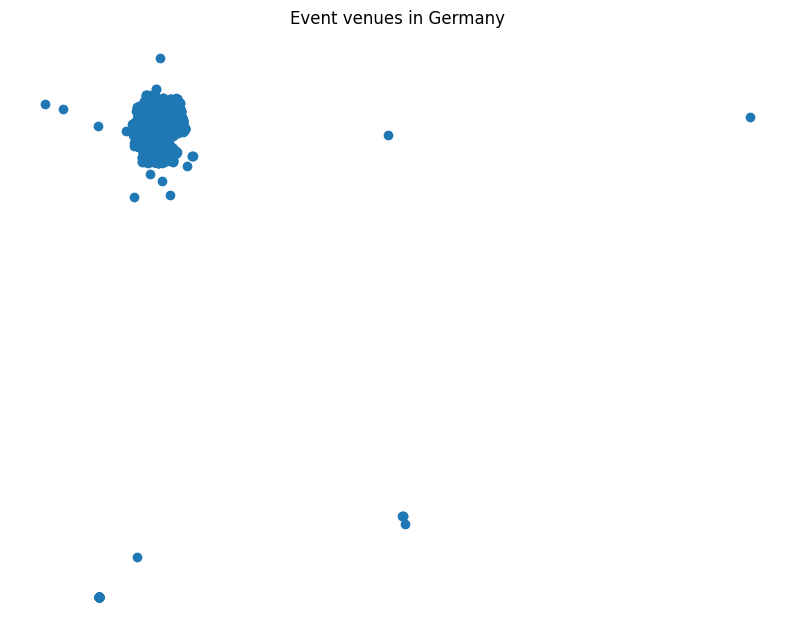

In [26]:
plot_country_venues(german_venues_df,"Germany")

<div class="alert alert-block alert-info">

11. You will find that some coordinates lie way beyond the German borders and can be assumed to be faulty. Set coordinate values to NA where the value of longitude is outside the range (5.866, 15.042) or where the value of latitude is outside the range (47.270, 55.059) (these coordinate ranges have been derived from the extreme points of Germany as listed on Wikipedia (see here). For extreme points of other countries, see here).
</div>

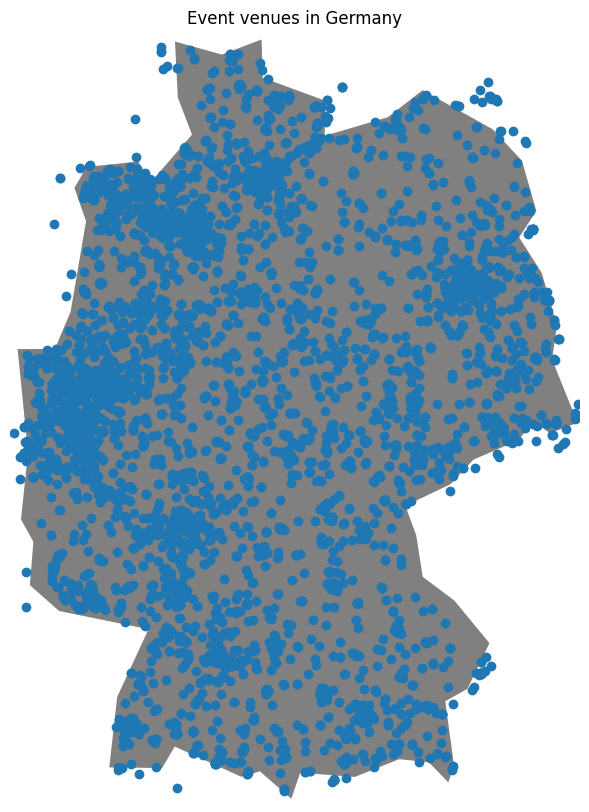

In [27]:
bounds_germany = [5.866, 15.042, 47.270, 55.059]
plot_country_venues(german_venues_df,"Germany",bounds_germany)

---

### Event locations in other countries

<div class="alert alert-block alert-info">
    
12. Repeat exercises (9)–(11) for another European country of your choice. (Hint: Clean code pays off! If you have coded the exercises efficiently, only very few adaptions need to be made.)
</div>

In [28]:
# Get and plot the event venues in Italy
italian_venues_df = get_country_venues('IT', ticketmaster_api_key)
italian_venues_df.head(10)

,name,city,postalCode,address,url,longitude,latitude
0,Live Club,Milan,20056,"Via Giuseppe Mazzini, 58",None,9.516927,45.599080
1,ITALY,Gardone Riviera,25083,"Corso Zanardelli, 196",https://www.ticketmaster.be/venue/italy-gardon...,NaN,NaN
2,ITALY,Rubano,35030,via Liguria 1 Sarmeola di Rubano,https://www.ticketmaster.be/venue/italy-rubano...,11.809616,45.421793
3,ITALY,Rome,00187,Via del babuino 9,https://www.ticketmaster.be/venue/italy-rome-t...,12.477795,41.910066
4,ITALY,Modena,41121,Via Stella 22,https://www.ticketmaster.be/venue/italy-modena...,10.921577,44.644832
5,ITALY,Rivoli,10098,Piazza Mafalda di Savoia Castello di Riv,https://www.ticketmaster.be/venue/italy-rivoli...,7.510579,45.069886
6,Teatro Nazionale CheBanca!,Milano,20149,None,None,9.154138,45.466710
7,Visarno Arena,Florence,50144,"viale del visarno,14",https://www.ticketmaster.es/venue/visarno-aren...,11.223020,43.781480
8,Stadthalle,Bozen,39100,Reschenstraße 39,https://www.ticketmaster.de/venue/stadthalle-b...,11.317210,46.491410
9,Arena di Verona,Verona,37121,Piazza Bra,https://www.ticketmaster.de/venue/arena-di-ver...,10.994190,45.438490


In [29]:
italian_venues_df.shape

(298, 7)

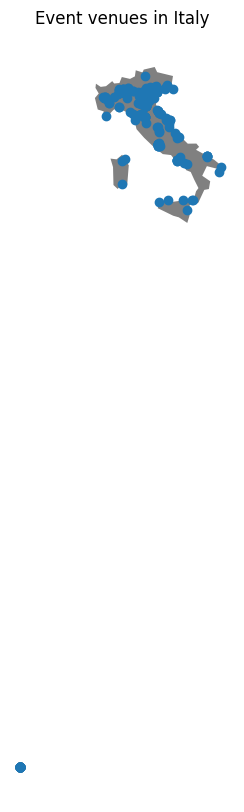

In [30]:
plot_country_venues(italian_venues_df,"Italy")

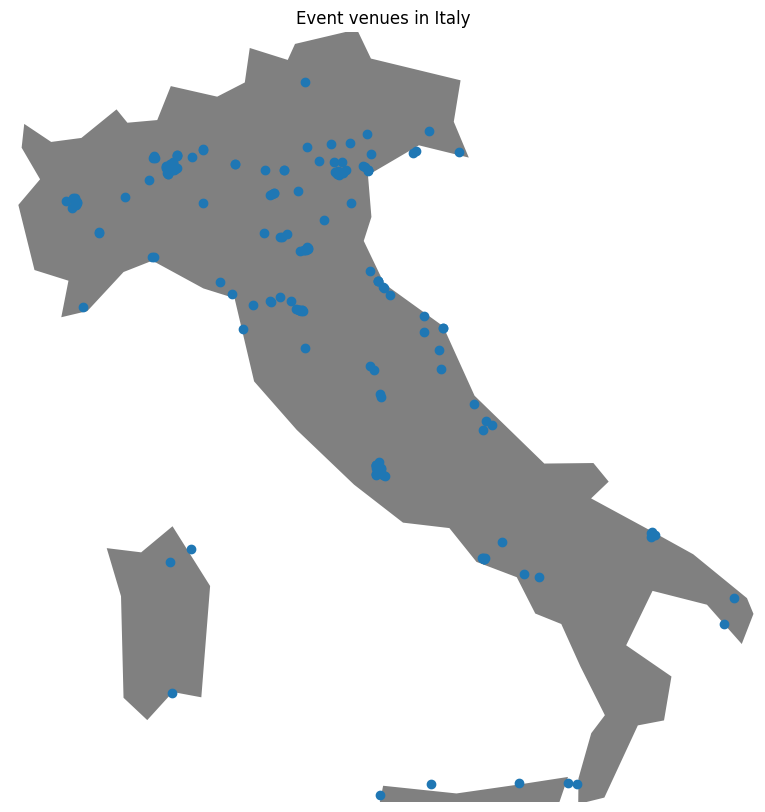

In [31]:
bounds_italy = [6.616667, 18.516667, 37.933333, 47.083333]
plot_country_venues(italian_venues_df,"Italy",bounds_italy)